<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Test Uniform, Default and Xavier Uniform Initialization on MNIST dataset with tanh activation</h1>



<h3>Objective for this Notebook<h3>    
<h5> 1. Define Several Neural Network, Criterion function, Optimizer</h5>
<h5> 2. Test Uniform, Default and Xavier Initialization </h5>     



<h2>Table of Contents</h2>
In this lab, you will test PyTroch Default Initialization, Xavier Initialization and Uniform Initialization on the MNIST dataset. 

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Make">Make Some Data</a></li>
    <li><a href="#Cost">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Train">Test Uniform, Default and Xavier Initialization</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>

<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


<h2>Preparation</h2>


We'll need the following libraries:  


In [1]:
# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the neural network module or class with Xavier Initialization


In [2]:
# Define the neural network with Xavier initialization

class Net_Xavier(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define the neural network module with Uniform Initialization:


In [3]:
# Define the neural network with Uniform initialization

class Net_Uniform(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define the neural network module with PyTroch Default Initialization


In [4]:
# Define the neural network with Default initialization

class Net(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define a function to train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 


In [5]:
# function to Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss':[], 'validation_accuracy':[]}  
    
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label==y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)
        
    return loss_accuracy

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [6]:
# Create the train dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [7]:
# Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the training-data loader and the validation-data loader object 


In [8]:
# Create Dataloader for both train dataset and validation dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Cost">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 


Create the criterion function


In [9]:
# Define criterion function

criterion = nn.CrossEntropyLoss()

Create the model with 100 hidden layers  


In [10]:
# Set the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15

<!--Empty Space for separating topics-->


<h2 id="Train">Test PyTorch Default Initialization, Xavier Initialization, Uniform Initialization</h2> 


Train the network using PyTorch Default Initialization


In [11]:
# Train the model with default initialization

model = Net(layers)
print(model.state_dict())
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

OrderedDict([('hidden.0.weight', tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
        [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
        [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]])), ('hidden.0.bias', tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
        -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
        -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
         2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
         2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
         2.7051e-02, -1.3991e-02,  9.7218e-03, -9.9075e-04,  1.6625e-03,
         2.3455e-02, -2.5294e-02,  4.8024e-06, -2.5339e-02, -1.7412e-02,
  

Train the network using Xavier Initialization function


In [12]:
# Train the model with Xavier initialization

model_Xavier = Net_Xavier(layers)
print(model_Xavier.state_dict())
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=learning_rate)
training_results_Xavier = train(model_Xavier, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

OrderedDict([('hidden.0.weight', tensor([[ 0.0435, -0.0175, -0.0440,  ..., -0.0595, -0.0764,  0.0713],
        [ 0.0543,  0.0099, -0.0633,  ..., -0.0487, -0.0292,  0.0299],
        [-0.0706,  0.0271,  0.0484,  ...,  0.0094,  0.0183, -0.0657],
        ...,
        [-0.0460,  0.0707, -0.0571,  ...,  0.0120, -0.0441, -0.0109],
        [-0.0172, -0.0162, -0.0702,  ..., -0.0475, -0.0288, -0.0609],
        [-0.0328,  0.0778, -0.0572,  ...,  0.0631,  0.0351, -0.0649]])), ('hidden.0.bias', tensor([ 0.0090,  0.0095,  0.0326,  0.0265, -0.0206,  0.0160,  0.0103,  0.0062,
         0.0017, -0.0054, -0.0032, -0.0048,  0.0346, -0.0260, -0.0200, -0.0084,
        -0.0332,  0.0006,  0.0262,  0.0329, -0.0217,  0.0199,  0.0118,  0.0144,
        -0.0107, -0.0308,  0.0329, -0.0185, -0.0236,  0.0215, -0.0233,  0.0036,
         0.0148, -0.0065, -0.0034, -0.0122,  0.0052,  0.0122, -0.0246, -0.0102,
        -0.0064,  0.0102,  0.0169,  0.0287, -0.0178,  0.0280, -0.0223,  0.0113,
        -0.0194,  0.0091, -0.0141

Train the network using Uniform Initialization


In [13]:
# Train the model with Uniform initialization

model_Uniform = Net_Uniform(layers)
print(model_Uniform.state_dict())
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

OrderedDict([('hidden.0.weight', tensor([[5.3193e-01, 1.1310e-01, 6.5981e-02,  ..., 4.7184e-01, 5.1255e-01,
         5.9537e-01],
        [5.3767e-01, 8.3352e-01, 6.9018e-01,  ..., 9.5189e-01, 6.8806e-01,
         7.1587e-01],
        [2.7778e-01, 1.0401e-01, 5.3614e-01,  ..., 6.1560e-01, 6.4697e-01,
         9.2533e-01],
        ...,
        [4.8871e-01, 2.3643e-01, 5.0014e-01,  ..., 4.1741e-04, 4.2658e-01,
         4.3769e-02],
        [3.3982e-01, 6.6505e-01, 5.0387e-01,  ..., 8.8639e-01, 8.9413e-01,
         9.7730e-01],
        [1.5268e-01, 5.9600e-01, 9.0554e-01,  ..., 1.0048e-01, 2.3736e-01,
         4.8117e-01]])), ('hidden.0.bias', tensor([-1.4635e-02, -3.5289e-02,  1.2315e-02,  3.2503e-02, -4.2121e-03,
        -2.5990e-02,  2.6589e-02,  3.3127e-02, -1.9615e-02, -1.4880e-02,
         2.6734e-02,  3.2725e-02, -1.2703e-02, -8.9076e-03, -2.1028e-05,
         3.3559e-02,  1.5303e-02, -3.4567e-03,  1.5009e-02, -2.0503e-02,
        -2.0011e-03,  1.7045e-02,  1.1625e-02, -3.3605e-02,

<!--Empty Space for separating topics-->


<h2 id="Result">Analyse Results</h2> 


Compare the training loss for each initialization


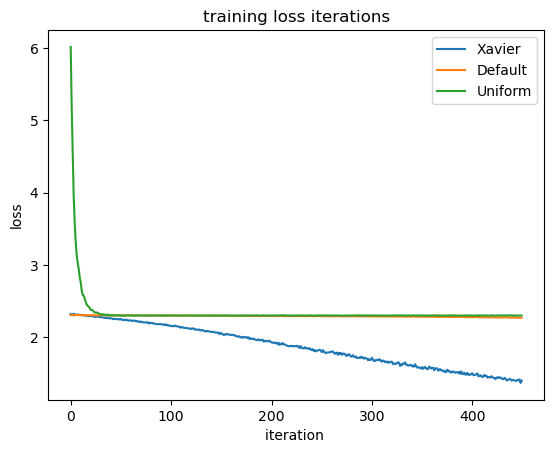

In [14]:
# Plot the loss

plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')  
plt.title('training loss iterations')
plt.legend()

compare the validation loss for each model  


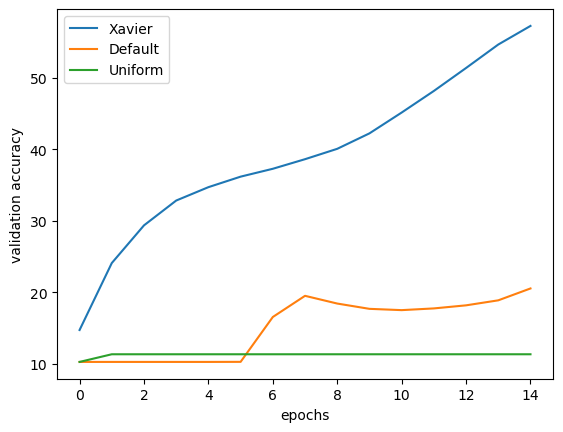

In [15]:
# Plot the accuracy

plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()


<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"></a>


<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
